In [1]:
import pandas as pd
import numpy as np

import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

import statsmodels.api as sm
from sklearn.model_selection import train_test_split

In [2]:
df = pd.read_csv("CBS_PC6_2016_v2_tested.csv")
df = df[["PC6","P_NW_MIG_A","M_INKHH","WOZWONING","UITKMINAOW"]]
df2 = pd.read_csv("Amsterdam_PC6_CBS_2016_V2.csv")
df2 = df2[["PC6"]]
df = df.merge(df2, on="PC6")

In [75]:
df.to_csv("CBS_AMS_2016V2_P.csv")

In [3]:
def clean_df(df):
    for f in df.columns:
        df = df[df[f] != -99997]
        df = df[df[f] != 'onclassificeerbaar']
        df = df[df[f] != '-99997']
    return df

In [38]:
m_inkhh = clean_df(df[['PC6','M_INKHH']]).reset_index(drop=True)

In [46]:
uitkminaow = clean_df(df[['PC6','UITKMINAOW']]).reset_index(drop=True)

/home/frank/anaconda3/lib/python3.8/site-packages/pandas/core/ops/array_ops.py:253: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  res_values = method(rvalues)


In [40]:
woz = clean_df(df[["PC6","WOZWONING"]]).reset_index(drop=True)

In [41]:
nwa = clean_df(df[["PC6", "P_NW_MIG_A"]]).reset_index(drop=True)

In [42]:
hhinkomen = ['00-20 laag','00-40 laag tot onder midden','00-60 laag tot midden','20-40 onder midden', '20-60 onder midden tot midden','20-80 onder midden tot boven midden','40-60 midden','40-80 midden tot boven midden','60-80 boven midden', '60-100 boven midden tot hoog', '80-100 hoog']
n_hhinkomen = [1,2,3,4,5,6,7,8,9,10,11]
m_inkhh["M_INKHH"] = m_inkhh["M_INKHH"].replace(hhinkomen, n_hhinkomen)

In [74]:
m_inkhh.to_csv("MIH.csv")
uitkminaow.to_csv("SSC.csv")
woz.to_csv("ARV.csv")
nwa.to_csv("NWIC.csv")

In [50]:
INC_WOZ = pd.merge(m_inkhh, woz, on=['PC6'])
INC_WOZ_NWA = pd.merge(INC_WOZ, nwa, on=['PC6'])
INC_WOZ_NWA_AOW = pd.merge(INC_WOZ_NWA, uitkminaow, on=['PC6'])

In [63]:
df_temp = INC_WOZ_NWA_AOW.rename(columns={"M_INKHH": "INC", "UITKMINAOW": "UIT", "WOZWONING": "WOZ", "P_NW_MIG_A":"NWA"})

In [70]:
#Using Pearson Correlation
def heatmap_pearson(df):
    plt.figure(figsize=(6,5))
    sns.set(font_scale=1.4)
    cor = df.corr()
    sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
    #plt.savefig('foo.png')
    plt.show()

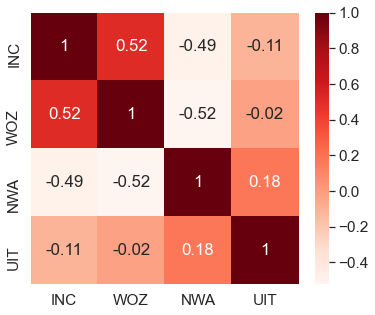

In [71]:
heatmap_pearson(df_temp)